In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [264]:
df = pd.read_csv("AMD1.csv",index_col='Date')

In [265]:
df = df['Open']

In [266]:
len(df)

2335

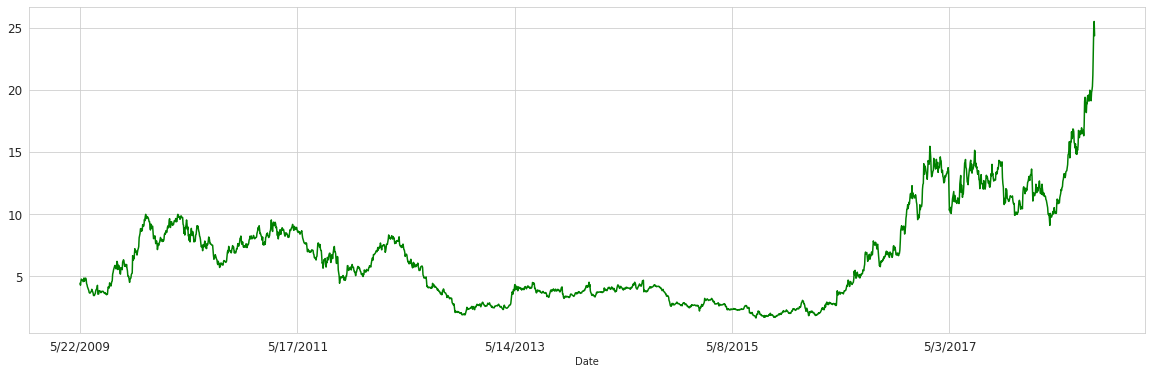

In [267]:
df.plot(c='g',fontsize=12,figsize=(20,6))
plt.show()

In [268]:
def data_prepare(data,n):
    X,y = [],[]
    for i in range(len(data)):
        idx = i + n
        if idx > len(data)-1:
            break
        qx,qy = data[i:idx], data[idx]
        X.append(qx)
        y.append(qy)
    return np.array(X),np.array(y)

n = 60
X = data_prepare(df,n)[0]
y = data_prepare(df,n)[1]

In [269]:
len(X)

2275

In [270]:
X.shape

(2275, 60)

In [271]:
X.shape[0]

2275

In [272]:
X.shape[0],X.shape[1]

(2275, 60)

In [273]:
# reshape X
x = X.reshape(X.shape[0],X.shape[1],1)
print(x.shape)

(2275, 60, 1)


In [274]:
x.shape[1],x.shape[2]

(60, 1)

In [275]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [278]:
X_train.shape,y_train.shape

((1592, 60, 1), (1592,))

In [279]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.optimizers import Adam,SGD

In [280]:
epochs = 150

In [281]:
#LSTM Model

model = Sequential()
model.add(LSTM(128,activation = 'relu',return_sequences = True,input_shape=(x.shape[1],x.shape[2])))
model.add(LSTM(64,activation = 'relu'))
model.add(Dense(1))
opt =  Adam(learning_rate=0.0001,beta_1=0.88,beta_2=0.999,)
model.compile(optimizer = opt, loss = 'mse')
hist = model.fit(X_train,y_train,validation_data= (X_test,y_test), epochs = epochs, verbose = 2,batch_size=32)

Train on 1592 samples, validate on 683 samples
Epoch 1/150
 - 7s - loss: 40.8590 - val_loss: 28.9967
Epoch 2/150
 - 6s - loss: 21.0818 - val_loss: 13.3436
Epoch 3/150
 - 6s - loss: 5.6480 - val_loss: 1.6467
Epoch 4/150
 - 6s - loss: 1.1502 - val_loss: 0.9903
Epoch 5/150
 - 6s - loss: 0.8840 - val_loss: 0.5898
Epoch 6/150
 - 6s - loss: 0.6953 - val_loss: 0.5066
Epoch 7/150
 - 6s - loss: 0.5047 - val_loss: 0.4224
Epoch 8/150
 - 6s - loss: 0.4363 - val_loss: 0.3919
Epoch 9/150
 - 6s - loss: 0.3938 - val_loss: 0.3473
Epoch 10/150
 - 6s - loss: 0.4168 - val_loss: 0.3590
Epoch 11/150
 - 6s - loss: 0.3935 - val_loss: 0.3323
Epoch 12/150
 - 6s - loss: 0.3524 - val_loss: 0.3283
Epoch 13/150
 - 6s - loss: 0.3415 - val_loss: 0.3087
Epoch 14/150
 - 6s - loss: 0.3239 - val_loss: 0.3271
Epoch 15/150
 - 6s - loss: 0.3250 - val_loss: 0.2967
Epoch 16/150
 - 6s - loss: 0.3065 - val_loss: 0.2952
Epoch 17/150
 - 7s - loss: 0.3085 - val_loss: 0.2872
Epoch 18/150
 - 6s - loss: 0.3041 - val_loss: 0.2891
Epoc

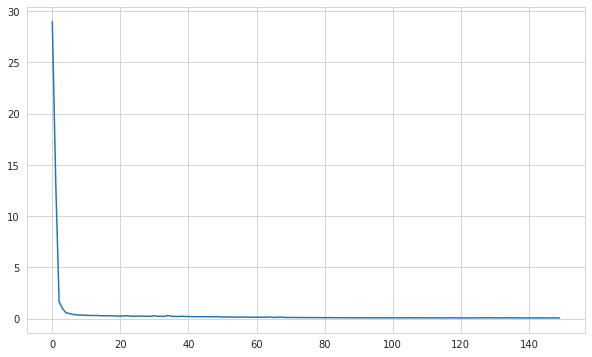

In [283]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(epochs),hist.history['val_loss'])
plt.show()

#### preparing next input and forecast

In [284]:
def forecast(days=10):
    Y = list(y).copy()
    forecst = [y[-1]]
    i=0
    while i < days:
        inputlst = []
        inputlst.append(Y[-n:])
        Xin = inputlst[0]
        xinp = np.array(Xin).reshape(-1,n,1)
        yhat = model.predict(xinp)
        yhat = yhat[0][0]
        Y.append(yhat)
        forecst.append(yhat)
        i = i + 1
    return Y,forecst

In [285]:
days= 20

In [286]:
Y,fore = forecast(days=days)

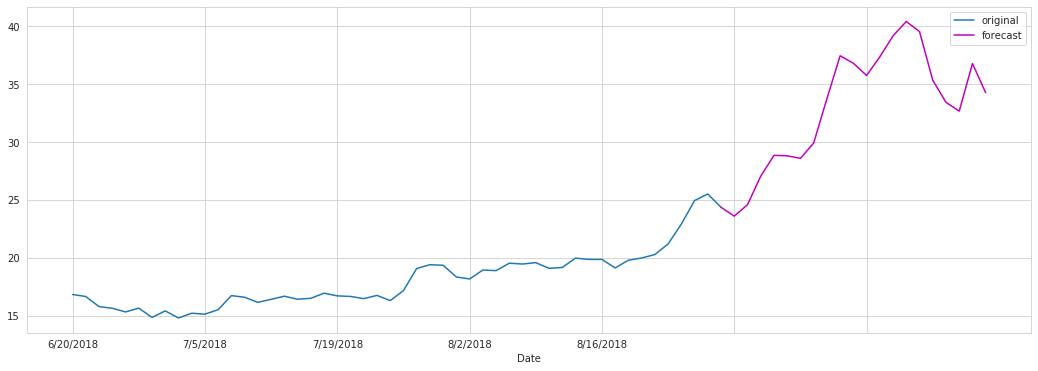

In [289]:
plt.figure(figsize=(18,6))
df[-50:].plot(label='original')
plt.plot(np.arange(50-1,50+days),fore,label='forecast',color='m')
plt.legend()
plt.show()

In [293]:
X_test.shape,y_test.shape

((683, 60, 1), (683,))

In [294]:
test_pred = model.predict(X_test)

In [298]:
pred = test_pred.reshape(-1)

In [301]:
y_test = y_test[-50:]
pred = pred[-50:]

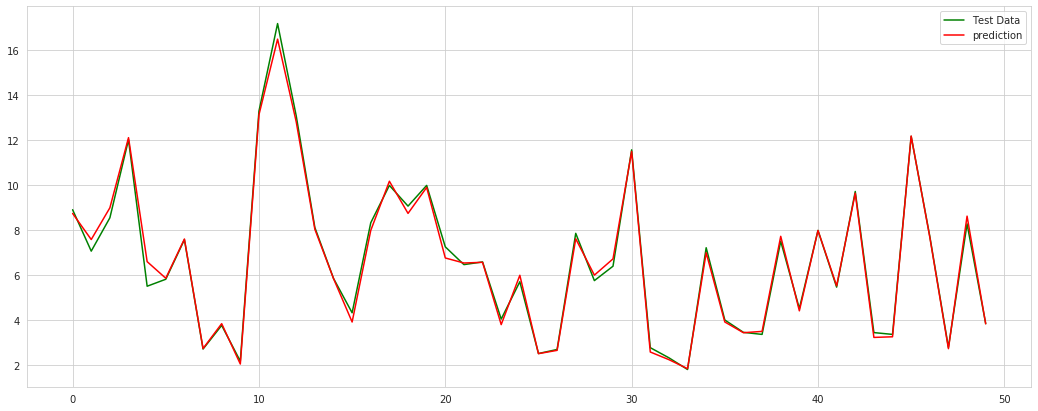

In [303]:
plt.figure(figsize=(18,7))
plt.plot(np.arange(len(y_test)),y_test,color='g',label='Test Data')
plt.plot(np.arange(len(pred)),pred,color='r',label='prediction')
plt.legend()
plt.show()